In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")

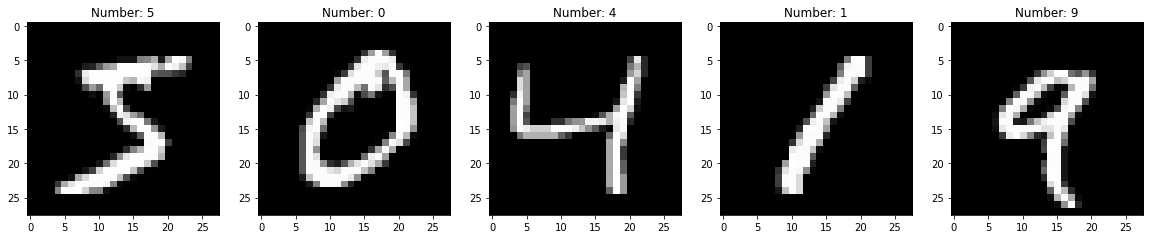

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Number: %s" % label)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [5]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9185


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
mdl.predict([X_test[0]])[0]

'9'

Prediction: 3


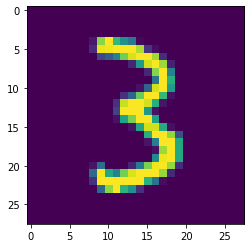

In [15]:
index = 2
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + mdl.predict([X_test[index]])[0])


In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1314,    0,    7,    1,    4,    8,   11,    2,    6,    2],
       [   0, 1541,   14,    5,    2,    5,    1,    0,   20,    2],
       [   6,   12, 1279,   21,   14,    9,   15,   18,   33,    3],
       [   8,    6,   46, 1251,    2,   48,    2,   14,   27,   10],
       [   7,    4,    5,    2, 1240,    2,   11,    6,   11,   42],
       [  21,    5,   15,   44,   12, 1101,   29,    6,   44,   15],
       [  11,    2,   10,    0,   11,   17, 1348,    2,    6,    1],
       [   3,    8,   19,   12,    8,    1,    0, 1328,    5,   58],
       [   8,   31,   12,   45,    8,   36,   14,    3, 1201,   18],
       [   8,    5,    4,   21,   33,    7,    1,   38,   10, 1256]])

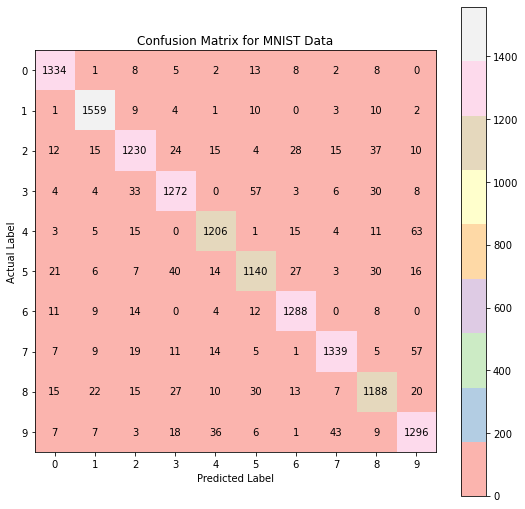

In [25]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')